# Importing Libraries

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import sobel

# Chosen Numbers for Binary Classification

In [171]:
number_one = 6 # UD ID
number_two = 1

# Training and Test Sets Data Path

In [172]:
train_data_path = 'DigitsTraining.csv'
test_data_path =  'DigitsTesting.csv'

# Create an Image from Pixel Data

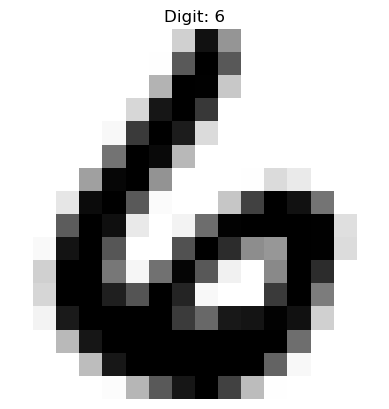

In [173]:
digits_training_df = pd.read_csv(train_data_path, header=None)
digits_testing_df = pd.read_csv(test_data_path, header=None)

first_digit_label = digits_training_df.iloc[0, 0]
first_digit_pixels = digits_training_df.iloc[0, 1:].values

# Reshape the pixel values (256) into a 16x16 grid
first_digit_image = first_digit_pixels.reshape(16, 16)

# Plot the image
plt.imshow(first_digit_image, cmap='gray')
plt.title(f'Digit: {int(first_digit_label)}')
plt.axis('off')
plt.show()

# Filtered Datasets Based on Chosen Numbers

In [174]:
train_data = digits_training_df[digits_training_df.iloc[:, 0].isin([number_one, number_two])]
test_data = digits_testing_df[digits_testing_df.iloc[:, 0].isin([number_one, number_two])]

In [175]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000,0.8155,0.0690,...,0.3480,0.0885,0.0000,0.2590,0.7370,0.9955,1.0,1.0,1.0,1.0
5,6,1.0,1.0,1.0,1.0,1.0,0.6985,0.0085,0.7675,1.0000,...,0.0985,0.4925,0.9310,0.9355,0.7185,1.0000,1.0,1.0,1.0,1.0
7,1,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000,0.2450,0.6065,...,0.8270,0.1670,0.3495,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0
9,1,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000,0.9545,0.0995,...,1.0000,0.6660,0.1325,0.3100,1.0000,1.0000,1.0,1.0,1.0,1.0
12,1,1.0,1.0,1.0,1.0,1.0,1.0000,0.9990,0.1935,0.6925,...,0.9840,0.4040,0.4205,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0


In [176]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0
3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0
4,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9290,0.553,...,0.0495,0.0495,0.0495,0.3550,0.6845,0.9335,1.0,1.0,1.0,1.0
8,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8805,0.281,...,0.0000,0.0000,0.1605,0.5085,0.9535,1.0000,1.0,1.0,1.0,1.0
10,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,0.963,...,0.1025,0.0000,0.0000,0.0460,0.3995,0.8000,1.0,1.0,1.0,1.0


# Extract Features from The Images: Average Intensity and Symmetry

 ## Average Intensity:
 ### **Definition**: 
The average intensity refers to the mean pixel value across all pixels in the image. Since the image is grayscale, each pixel value represents the intensity (brightness) of that pixel. In a 16x16 image, this would be the mean of all 256 pixel values.


### **How to Calculate**: 
Sum all pixel values and divide by the number of pixels (256 for a 16x16 image).

##  Symmetry
1. **Overall Symmetry**:
   $S = \frac{S_v + S_h}{2}$
   - This means the symmetry score \( S \) is the average of the vertical and horizontal symmetry values.

2. **Vertical Symmetry $ S_v $**:
   $S_v = \frac{1}{256} \sum_{i=1}^{16} \sum_{j=1}^{16} | I[i, j] - I_{fv}[i, j] |$
   - $ I[i, j] $ is the pixel value at position $(i, j)$ in the original image.
   - $ I_{fv}[i, j] $ is the pixel value at position $(i, j)$ in the vertically flipped version of the image.
   - The absolute difference between these pixel values is calculated and summed over all pixels, and then divided by 256 (the total number of pixels in a 16x16 image) to normalize the result.


3. **Horizontal Symmetry $ S_h $**:
    $S_h = \frac{1}{256} \sum_{i=1}^{16} \sum_{j=1}^{16} | I[i, j] - I_{fh}[i, j] |$
   - $ I_{fh}[i, j] $ is the pixel value at position $(i, j)$ in the horizontally flipped version of the image.
   - Similar to $ S_v $, you calculate the absolute difference between corresponding pixel values in the original and horizontally flipped images.
### To calculate this:
1. **Vertical Symmetry**: 
   - Flip the image vertically.
   - Compare each pixel in the original image to its corresponding pixel in the vertically flipped image.
   - Take the absolute difference, sum these differences, and normalize by dividing by 256.

2. **Horizontal Symmetry**: 
   - Flip the image horizontally.
   - Compare each pixel in the original image to its corresponding pixel in the horizontally flipped image.
   - Again, take the absolute difference, sum these differences, and normalize by dividing by 256.

## Additional Feature Options:

1. **Edge Density**:
   - This feature captures the amount of edges (transitions between light and dark pixels) in the image. This can be calculated by detecting edges using simple difference-based filters or more advanced methods like Sobel filters.
   - **Use case**: Digits with more complex structures (e.g., 8, 5) have more edges compared to simpler digits (e.g., 1, 0).

2. **Aspect Ratio**:
   - Measures the "shape" of the digit by comparing its height to width. For example, digit 1 is tall and narrow, whereas digit 8 has a more uniform aspect ratio.
   - **Use case**: Helps distinguish digits with different height-to-width ratios.

3. **Bounding Box Compactness**:
   - This is the ratio of the number of foreground pixels (black pixels in your dataset) to the area of the bounding box that encloses the digit. This gives an indication of how "compact" the digit is within its bounding box.
   - **Use case**: Helps differentiate between thin digits (e.g., 1) and thicker, more filled-in digits (e.g., 5, 8).

4. **Center of Mass (Centroid)**:
   - This is a measure of the "center" of mass of the digit, i.e., the weighted average of the pixel coordinates. This tells us where the mass of the digit is located on the 2D plane.
   - **Use case**: This feature is useful to differentiate digits that are top-heavy (e.g., 9, 5) versus those that are centered or bottom-heavy (e.g., 0, 1).

In [177]:
def extract_features(image_row):
    # Get the image (16x16)
    image = image_row[1:].values.reshape(16, 16)

    # Average intensity
    avg_intensity = np.mean(image)
    
    # Vertical symmetry
    vertical_flipped_image = np.flipud(image)
    
    Sv = np.sum(np.abs(image - vertical_flipped_image)) / 256
    
    # Horizontal symmetry
    horizontal_flipped_image = np.fliplr(image)
    Sh = np.sum(np.abs(image - horizontal_flipped_image)) / 256
    
    # Overall symmetry
    symmetry = (Sh + Sv) / 2
    
    # Edge density using Sobel filter
    sobel_x = sobel(image, axis=0)  # Horizontal edges
    sobel_y = sobel(image, axis=1)  # Vertical edges
    edge_magnitude = np.hypot(sobel_x, sobel_y)  # Magnitude of the edges
    edge_density = np.sum(edge_magnitude > 0.1) / 256  # Count of edge pixels (threshold 0.1) and normalize
    
    return np.array([avg_intensity, symmetry, edge_density])

# Prepare training and testing features

In [178]:
X_train = np.array([extract_features(row) for _, row in train_data.iterrows()])
y_train = np.where(train_data.iloc[:, 0] == number_two, 1, -1)  # Assuming binary classification for digits number_one and number_two

X_test = np.array([extract_features(row) for _, row in test_data.iterrows()])
y_test = np.where(test_data.iloc[:, 0] == number_two, 1, -1)  # Binary classification for digits number_one and number_two


In [179]:
X_train

array([[0.6589082 , 0.28305859, 0.7265625 ],
       [0.78721484, 0.23258594, 0.59765625],
       [0.87695703, 0.04424219, 0.31640625],
       ...,
       [0.80489648, 0.07612109, 0.4140625 ],
       [0.8311543 , 0.03639062, 0.3671875 ],
       [0.7237793 , 0.05726563, 0.4140625 ]])

0.658908203125


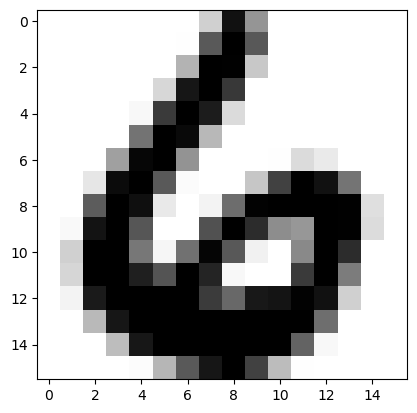

In [180]:
plt.imshow(train_data.iloc[0, 1:].values.reshape(16, 16), cmap='gray')
print(np.mean(train_data.iloc[0, 1:].values.reshape(16, 16)))
# print(train_data.iloc[0, 1:].values.reshape(16, 16))

0.78721484375


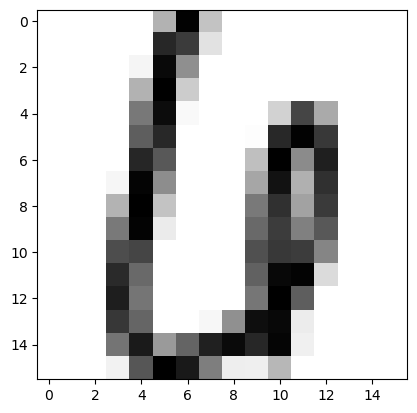

In [181]:
plt.imshow(train_data.iloc[1, 1:].values.reshape(16, 16), cmap='gray')
print(np.mean(train_data.iloc[1, 1:].values.reshape(16, 16)))
# print(train_data.iloc[1, 1:].values.reshape(16, 16))

In [182]:
y_train

array([-1, -1,  1, ...,  1,  1,  1])

In [183]:
X_test

array([[0.73486719, 0.318875  , 0.6875    ],
       [0.73515039, 0.25978906, 0.671875  ],
       [0.65466211, 0.41990234, 0.7421875 ],
       ...,
       [0.82299805, 0.05974609, 0.3828125 ],
       [0.76445703, 0.23924219, 0.59765625],
       [0.81102344, 0.04883203, 0.3671875 ]])

In [184]:
y_test

array([-1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1

# Illustration of Features

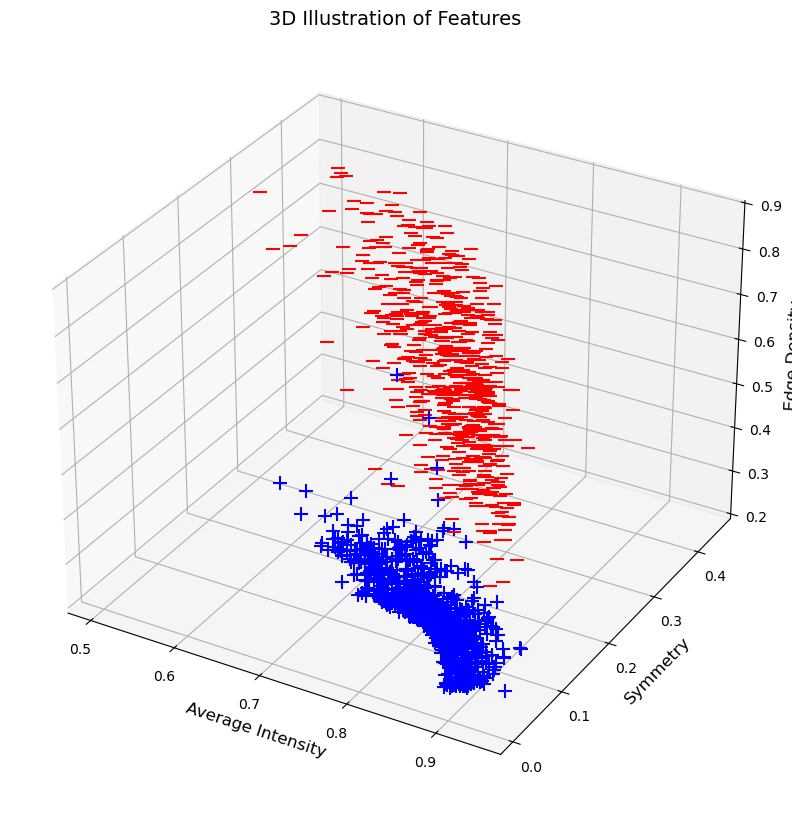

In [185]:
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(y_train)):
    if y_train[i] == 1:
        ax.scatter(X_train[i, 0], X_train[i, 1], X_train[i, 2], marker='+', color='blue', s=100)
    else:
        ax.scatter(X_train[i, 0], X_train[i, 1], X_train[i, 2], marker='_', color='red', s=100)

ax.set_title(f"3D Illustration of Features", fontsize=14)
ax.set_xlabel('Average Intensity', fontsize=12)
ax.set_ylabel('Symmetry', fontsize=12)
ax.set_zlabel('Edge Density', fontsize=12)
plt.show()

# Function to plot decision boundary and data points

In [186]:
def plot_decision_boundary(X, y, weights, bias, iteration, misclassified_points=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points
    for i in range(len(y)):
        if y[i] == 1:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], marker='+', color='blue', s=100)
        else:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], marker='_', color='red', s=100)

    # Plot misclassified points
    if misclassified_points is not None:
        ax.scatter(X[misclassified_points, 0], X[misclassified_points, 1], X[misclassified_points, 2], facecolors='none', edgecolors='green', s=150, linewidths=2)

    # Create a meshgrid for plotting the decision boundary plane
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 10)
    y_vals = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

    if weights[2] != 0:  # Avoid division by zero
        Z_vals = -(weights[0] * X_vals + weights[1] * Y_vals + bias) / weights[2]
        ax.plot_surface(X_vals, Y_vals, Z_vals, color='magenta', alpha=0.6, label='Decision Boundary')

    ax.set_title(f"Iteration {iteration}: Decision Boundary")
    ax.set_xlabel('Average Intensity')
    ax.set_ylabel('Symmetry')
    ax.set_zlabel('Edge Density')
    plt.show()

# Function to calculate the classification error
You're right to question whether the $E_{in}$ and $E_{out}$ calculations were implemented properly, based on the slide you provided. Let's carefully revisit the error definitions and compare them with the code implementation:

### Error Definitions:

- **In-sample error $E_{in}$**: This is the average error on the training set. It’s calculated as:
  $E_{in}(h) = \frac{1}{N} \sum_{n=1}^{N} e(h(x_n), f(x_n))$
  Where:
  -  $N$ is the number of training samples.
  -  $h(x_n)$ is the hypothesis (prediction) for the $n$-th training example.
  -  $f(x_n)$ is the actual label for the $n$-th training example.
  -  $e$ represents a misclassification: if the prediction $h(x_n) \neq f(x_n)$, then there is an error.

- **Out-of-sample error $E_{out}$**: This is the expected error on unseen data (test set), which is calculated similarly to $E_{in}$ but on the test data:
  $E_{out}(h) = \frac{1}{N_{\text{test}}} \sum_{n=1}^{N_{\text{test}}} e(h(x_n), f(x_n))$

In [187]:
def calculate_error(X, y, weights, bias):
    predictions = np.sign(np.dot(X, weights) + bias)
    return np.mean(predictions != y)

# Perceptron Learning Algorithm (PLA)

In [188]:
def perceptron_learning_algorithm(X_train, y_train, X_test, y_test, max_iterations=200):
    # Initialize weights and bias
    weights = np.zeros(X_train.shape[1])
    bias = 0
    iteration = 0
    num_samples = len(y_train)
    E_in_values = []
    E_out_values = []
    
    # Learning loop
    while iteration < max_iterations:
        misclassified_points = []
        # Calculate errors
        
        E_in = calculate_error(X_train, y_train, weights, bias)
        E_out = calculate_error(X_test, y_test, weights, bias)
        E_in_values.append(E_in)
        E_out_values.append(E_out)
        
        print(f"Iteration {iteration} - Weights: {weights}, Bias: {bias}")
        
        for i in range(num_samples):
            if y_train[i] * (np.dot(X_train[i], weights) + bias) <= 0:
                # Update the weights and bias for misclassified point
                weights += y_train[i] * X_train[i]
                bias += y_train[i]
                misclassified_points.append(i)
        
        # Plot decision boundary after each iteration
        # plot_decision_boundary(X, y, weights, bias, iteration, misclassified_points)
        
        # Check if any misclassified points exist
        if len(misclassified_points) == 0:
            print("Converged!")
            break
        
        iteration += 1
    return weights, bias, E_in_values, E_out_values

# Prediction function

In [189]:
def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)

# Train the model

Iteration 0 - Weights: [0. 0. 0.], Bias: 0
Iteration 1 - Weights: [ 2.75536328 -6.34001172 -5.64453125], Bias: 2
Iteration 2 - Weights: [ 2.46888477 -8.41312891 -6.52734375], Bias: 3
Iteration 3 - Weights: [ 1.40903711 -9.92722656 -7.0625    ], Bias: 3
Iteration 4 - Weights: [  1.03333203 -11.47246094  -7.28125   ], Bias: 4
Iteration 5 - Weights: [  1.13854492 -11.92148047  -6.98828125], Bias: 5
Iteration 6 - Weights: [  0.28431836 -13.14166016  -7.5703125 ], Bias: 5
Iteration 7 - Weights: [  0.69230078 -13.48679297  -7.203125  ], Bias: 6
Iteration 8 - Weights: [ -0.39127734 -14.49722266  -7.796875  ], Bias: 6
Iteration 9 - Weights: [ -0.11011133 -14.82303516  -7.34765625], Bias: 7
Iteration 10 - Weights: [ -0.76195703 -15.35262891  -7.50390625], Bias: 7
Iteration 11 - Weights: [ -1.38539258 -16.12074219  -7.89453125], Bias: 7
Iteration 12 - Weights: [ -1.05692188 -16.34388281  -7.42578125], Bias: 8
Iteration 13 - Weights: [ -1.59612891 -16.79885156  -7.5859375 ], Bias: 8
Iteration 14 

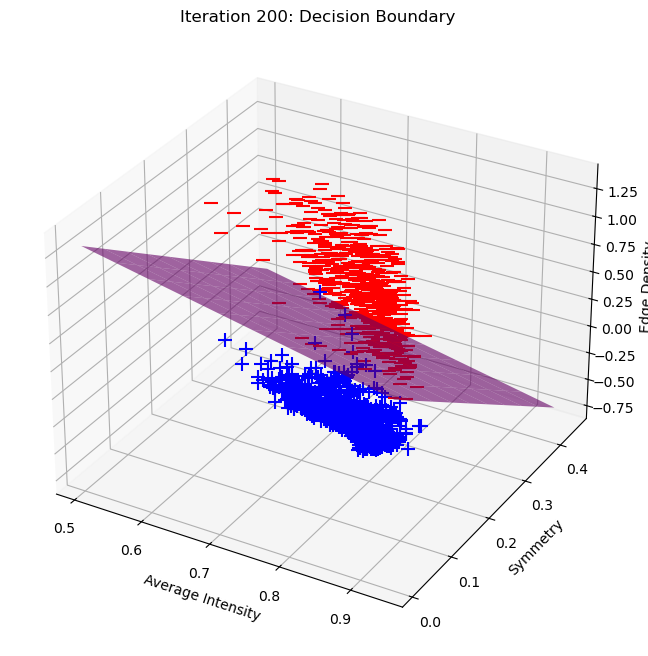

In [190]:
weights, bias, E_in_values, E_out_values = perceptron_learning_algorithm(X_train, y_train, X_test, y_test)
plot_decision_boundary(X_train, y_train, weights, bias, 200)

# Calculate Eout on the test set

In [191]:
y_pred_test = predict(X_test, weights, bias)
Eout = np.mean(y_pred_test != y_test)

print("Out-of-sample error (Eout):", Eout)

Out-of-sample error (Eout): 0.02534562211981567


# Plot the in-sample and out-of-sample error over iterations

/tmp/ipykernel_35173/2687744610.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 0.5)


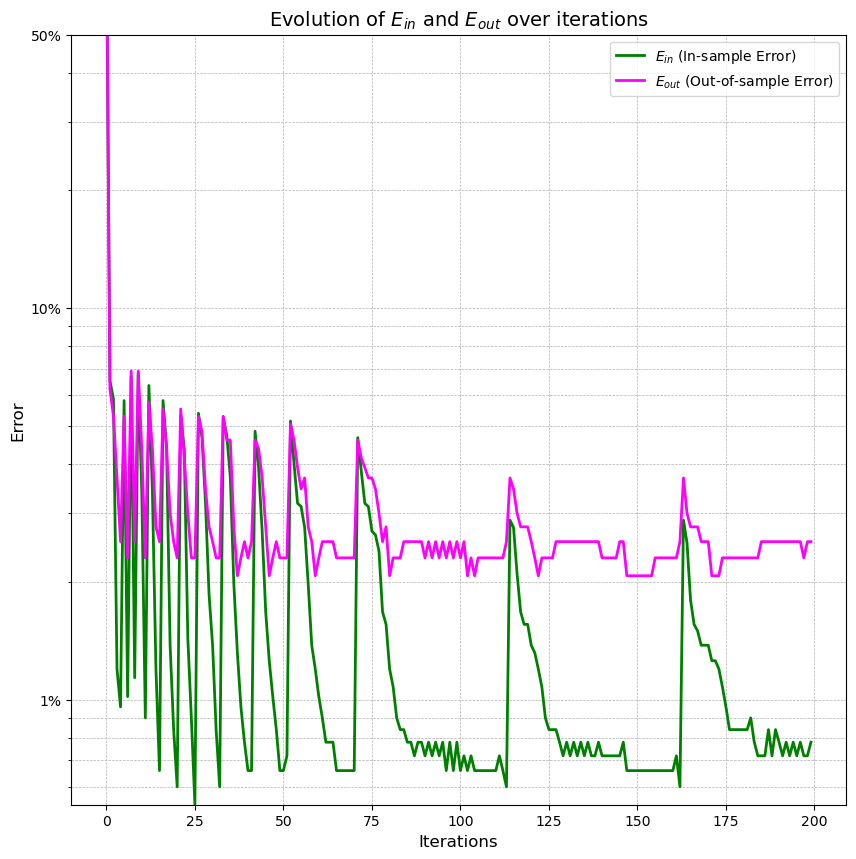

In [192]:
plt.figure(figsize=(10, 10))

plt.plot(E_in_values, label=r'$E_{in}$ (In-sample Error)', color='green', linewidth=2)
plt.plot(E_out_values, label=r'$E_{out}$ (Out-of-sample Error)', color='magenta', linewidth=2)

plt.yscale('log')
plt.yticks([0, 0.01, 0.1, 0.5], ['0%', '1%', '10%', '50%'])
plt.ylim(0, 0.5)

plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title(r'Evolution of $E_{in}$ and $E_{out}$ over iterations', fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(loc='upper right', fontsize=10)
plt.show()